### 1. Import Libraries

In [37]:
import torch
import torch.nn as nn
from torchvision import transforms, models
from PIL import Image
import os
import cv2
import numpy as np
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from IPython.display import display

print("✅ All libraries imported successfully!")

✅ All libraries imported successfully!


### 2. Configuration and Device Setup

In [38]:
# =======================================
# Configuration
# =======================================
MODEL_PATH = "model/GTSRB_resnet50_E18_VAL100.00.pth"
INPUT_FOLDER = "input"
NUM_CLASSES = 43  # GTSRB has 43 traffic sign classes
IMG_SIZE = 224

# Device setup
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"✅ Using device: {device}")

✅ Using device: cuda


### 3. Load Class Names from GTSRB Dataset

In [39]:
# GTSRB Class Names - Official German Traffic Sign Recognition Benchmark
class_names = {
    0: 'Speed limit (20km/h)',
    1: 'Speed limit (30km/h)',
    2: 'Speed limit (50km/h)',
    3: 'Speed limit (60km/h)',
    4: 'Speed limit (70km/h)',
    5: 'Speed limit (80km/h)',
    6: 'End of speed limit (80km/h)',
    7: 'Speed limit (100km/h)',
    8: 'Speed limit (120km/h)',
    9: 'No passing',
    10: 'No passing for vehicles over 3.5 metric tons',
    11: 'Right-of-way at the next intersection',
    12: 'Priority road',
    13: 'Yield',
    14: 'Stop',
    15: 'No vehicles',
    16: 'Vehicles over 3.5 metric tons prohibited',
    17: 'No entry',
    18: 'General caution',
    19: 'Dangerous curve to the left',
    20: 'Dangerous curve to the right',
    21: 'Double curve',
    22: 'Bumpy road',
    23: 'Slippery road',
    24: 'Road narrows on the right',
    25: 'Road work',
    26: 'Traffic signals',
    27: 'Pedestrians',
    28: 'Children crossing',
    29: 'Bicycles crossing',
    30: 'Beware of ice/snow',
    31: 'Wild animals crossing',
    32: 'End of all speed and passing limits',
    33: 'Turn right ahead',
    34: 'Turn left ahead',
    35: 'Ahead only',
    36: 'Go straight or right',
    37: 'Go straight or left',
    38: 'Keep right',
    39: 'Keep left',
    40: 'Roundabout mandatory',
    41: 'End of no passing',
    42: 'End of no passing by vehicles over 3.5 metric tons'
}

print(f"✅ Loaded {len(class_names)} GTSRB class names")

✅ Loaded 43 GTSRB class names


### 4. Load Trained Model

In [40]:
# Load the trained ResNet50 model
print("🔄 Loading model...")

# Recreate model architecture
model = models.resnet50(weights=None)
in_features = model.fc.in_features
model.fc = nn.Sequential(
    nn.Dropout(0.4),
    nn.Linear(in_features, NUM_CLASSES)
)

# Load trained weights
checkpoint = torch.load(MODEL_PATH, map_location=device)
model.load_state_dict(checkpoint['model_state_dict'])
model.to(device)
model.eval()

print(f"✅ Model loaded successfully!")
print(f"   Architecture: ResNet50")
print(f"   Classes: {NUM_CLASSES}")
print(f"   Best Epoch: {checkpoint['epoch']}")
print(f"   Validation Accuracy: {checkpoint['val_acc']*100:.2f}%")

🔄 Loading model...
✅ Model loaded successfully!
   Architecture: ResNet50
   Classes: 43
   Best Epoch: 18
   Validation Accuracy: 100.00%
✅ Model loaded successfully!
   Architecture: ResNet50
   Classes: 43
   Best Epoch: 18
   Validation Accuracy: 100.00%


### 5. Define Preprocessing Pipeline

In [41]:
# Image preprocessing (same as training)
preprocess = transforms.Compose([
    transforms.Resize((IMG_SIZE, IMG_SIZE)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

print("✅ Preprocessing pipeline defined")

✅ Preprocessing pipeline defined


### 6. Inference Function for Images

In [42]:
def predict_image(image_path, model, preprocess, device, class_names):
    """
    Predict traffic sign class for a single image.
    
    Args:
        image_path: Path to input image
        model: Trained PyTorch model
        preprocess: Preprocessing transforms
        device: torch device (cuda/cpu)
        class_names: Dictionary mapping class IDs to names
        
    Returns:
        Dictionary with prediction results including the resized image
    """
    # Load and preprocess image
    img = Image.open(image_path).convert("RGB")
    img_resized = img.resize((224, 224), Image.LANCZOS)
    img_tensor = preprocess(img).unsqueeze(0).to(device)
    
    # Predict
    with torch.no_grad():
        outputs = model(img_tensor)
        probabilities = torch.softmax(outputs, dim=1)
        confidence, predicted_class = torch.max(probabilities, 1)
    
    predicted_id = predicted_class.item()
    predicted_label = class_names.get(predicted_id, f"Unknown ({predicted_id})")
    conf_percentage = confidence.item() * 100
    
    return {
        "file": os.path.basename(image_path),
        "predicted_class_id": predicted_id,
        "predicted_class_name": predicted_label,
        "confidence": conf_percentage,
        "image": img_resized
    }

print("✅ Image inference function defined")

✅ Image inference function defined


### 7. Process All Images in Input Folder

Processing 43 image(s)



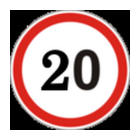

File: 0.png
Class ID: 0
Class Name: Speed limit (20km/h)
Confidence: 49.91%



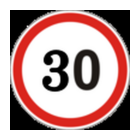

File: 1.png
Class ID: 5
Class Name: Speed limit (80km/h)
Confidence: 99.99%



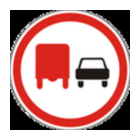

File: 10.png
Class ID: 10
Class Name: No passing for vehicles over 3.5 metric tons
Confidence: 100.00%



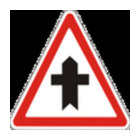

File: 11.png
Class ID: 11
Class Name: Right-of-way at the next intersection
Confidence: 100.00%



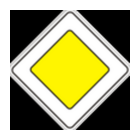

File: 12.png
Class ID: 12
Class Name: Priority road
Confidence: 100.00%



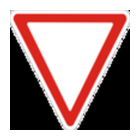

File: 13.png
Class ID: 13
Class Name: Yield
Confidence: 100.00%



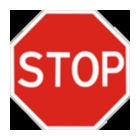

File: 14.png
Class ID: 14
Class Name: Stop
Confidence: 100.00%



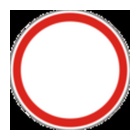

File: 15.png
Class ID: 15
Class Name: No vehicles
Confidence: 100.00%



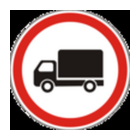

File: 16.png
Class ID: 16
Class Name: Vehicles over 3.5 metric tons prohibited
Confidence: 100.00%



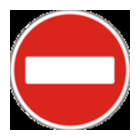

File: 17.png
Class ID: 17
Class Name: No entry
Confidence: 100.00%



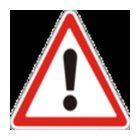

File: 18.png
Class ID: 18
Class Name: General caution
Confidence: 100.00%



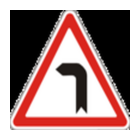

File: 19.png
Class ID: 19
Class Name: Dangerous curve to the left
Confidence: 99.91%



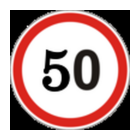

File: 2.png
Class ID: 2
Class Name: Speed limit (50km/h)
Confidence: 75.42%



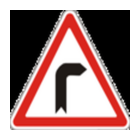

File: 20.png
Class ID: 20
Class Name: Dangerous curve to the right
Confidence: 100.00%



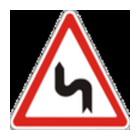

File: 21.png
Class ID: 21
Class Name: Double curve
Confidence: 100.00%



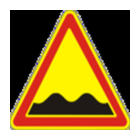

File: 22.png
Class ID: 22
Class Name: Bumpy road
Confidence: 99.80%



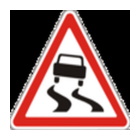

File: 23.png
Class ID: 23
Class Name: Slippery road
Confidence: 99.99%



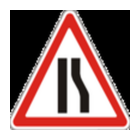

File: 24.png
Class ID: 24
Class Name: Road narrows on the right
Confidence: 100.00%



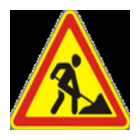

File: 25.png
Class ID: 26
Class Name: Traffic signals
Confidence: 96.72%



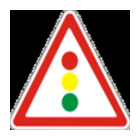

File: 26.png
Class ID: 26
Class Name: Traffic signals
Confidence: 100.00%



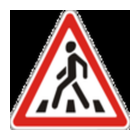

File: 27.png
Class ID: 28
Class Name: Children crossing
Confidence: 56.65%



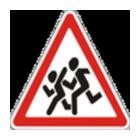

File: 28.png
Class ID: 28
Class Name: Children crossing
Confidence: 99.83%



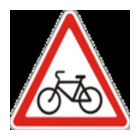

File: 29.png
Class ID: 29
Class Name: Bicycles crossing
Confidence: 99.99%



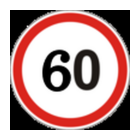

File: 3.png
Class ID: 3
Class Name: Speed limit (60km/h)
Confidence: 99.97%



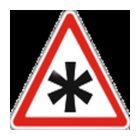

File: 30.png
Class ID: 28
Class Name: Children crossing
Confidence: 99.62%



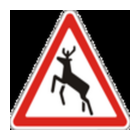

File: 31.png
Class ID: 31
Class Name: Wild animals crossing
Confidence: 99.05%



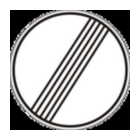

File: 32.png
Class ID: 32
Class Name: End of all speed and passing limits
Confidence: 100.00%



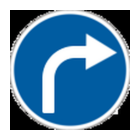

File: 33.png
Class ID: 33
Class Name: Turn right ahead
Confidence: 100.00%



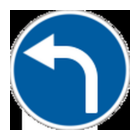

File: 34.png
Class ID: 34
Class Name: Turn left ahead
Confidence: 100.00%



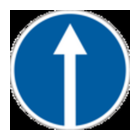

File: 35.png
Class ID: 35
Class Name: Ahead only
Confidence: 100.00%



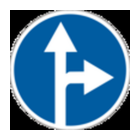

File: 36.png
Class ID: 36
Class Name: Go straight or right
Confidence: 100.00%



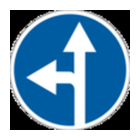

File: 37.png
Class ID: 37
Class Name: Go straight or left
Confidence: 100.00%



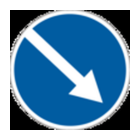

File: 38.png
Class ID: 38
Class Name: Keep right
Confidence: 100.00%



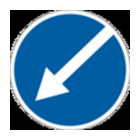

File: 39.png
Class ID: 39
Class Name: Keep left
Confidence: 99.99%



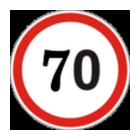

File: 4.png
Class ID: 4
Class Name: Speed limit (70km/h)
Confidence: 94.77%



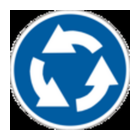

File: 40.png
Class ID: 40
Class Name: Roundabout mandatory
Confidence: 42.63%



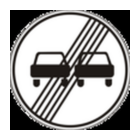

File: 41.png
Class ID: 41
Class Name: End of no passing
Confidence: 100.00%



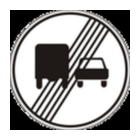

File: 42.png
Class ID: 42
Class Name: End of no passing by vehicles over 3.5 metric tons
Confidence: 100.00%



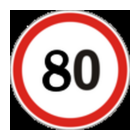

File: 5.png
Class ID: 5
Class Name: Speed limit (80km/h)
Confidence: 100.00%



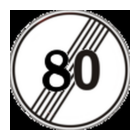

File: 6.png
Class ID: 5
Class Name: Speed limit (80km/h)
Confidence: 98.17%



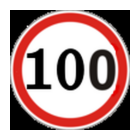

File: 7.png
Class ID: 1
Class Name: Speed limit (30km/h)
Confidence: 92.34%



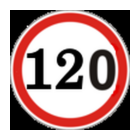

File: 8.png
Class ID: 1
Class Name: Speed limit (30km/h)
Confidence: 53.09%



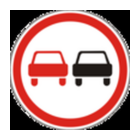

File: 9.png
Class ID: 9
Class Name: No passing
Confidence: 99.99%

Processed 43/43 images


In [43]:
# Process all images in input folder
valid_image_extensions = ('.png', '.jpg', '.jpeg', '.bmp', '.tiff', '.webp')

image_files = [f for f in os.listdir(INPUT_FOLDER) 
               if f.lower().endswith(valid_image_extensions)]

if not image_files:
    print("No images found in input folder")
    print(f"Add images to: {INPUT_FOLDER}/")
else:
    print(f"Processing {len(image_files)} image(s)\n")
    
    results = []
    for idx, filename in enumerate(image_files, 1):
        img_path = os.path.join(INPUT_FOLDER, filename)
        
        try:
            result = predict_image(img_path, model, preprocess, device, class_names)
            results.append(result)
            
            # Display very small image
            plt.figure(figsize=(1.5, 1.5))
            plt.imshow(result['image'])
            plt.axis('off')
            plt.tight_layout()
            plt.show()
            
            print(f"File: {result['file']}")
            print(f"Class ID: {result['predicted_class_id']}")
            print(f"Class Name: {result['predicted_class_name']}")
            print(f"Confidence: {result['confidence']:.2f}%\n")
            
        except Exception as e:
            print(f"Error: {str(e)}\n")
    
    print(f"Processed {len(results)}/{len(image_files)} images")

### 8. Video Processing Function (Optional)

In [44]:
def process_video(video_path, model, preprocess, device, class_names, frame_interval=30):
    """
    Process video and classify traffic signs in sampled frames.
    
    Args:
        video_path: Path to input video
        model: Trained PyTorch model
        preprocess: Preprocessing transforms
        device: torch device (cuda/cpu)
        class_names: Dictionary mapping class IDs to names
        frame_interval: Process every Nth frame (default: 30)
        
    Returns:
        List of predictions for sampled frames
    """
    cap = cv2.VideoCapture(video_path)
    if not cap.isOpened():
        print(f"❌ Error: Cannot open video {video_path}")
        return []
    
    fps = cap.get(cv2.CAP_PROP_FPS)
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    
    print(f"📹 Video Info:")
    print(f"   FPS: {fps:.2f}")
    print(f"   Total Frames: {total_frames}")
    print(f"   Processing every {frame_interval} frames\n")
    
    results = []
    frame_count = 0
    
    while True:
        ret, frame = cap.read()
        if not ret:
            break
        
        # Process every Nth frame
        if frame_count % frame_interval == 0:
            # Convert BGR to RGB
            frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            img = Image.fromarray(frame_rgb)
            
            # Preprocess and predict
            img_tensor = preprocess(img).unsqueeze(0).to(device)
            
            with torch.no_grad():
                outputs = model(img_tensor)
                probabilities = torch.softmax(outputs, dim=1)
                confidence, predicted_class = torch.max(probabilities, 1)
            
            predicted_id = predicted_class.item()
            predicted_label = class_names.get(predicted_id, f"Unknown ({predicted_id})")
            conf_percentage = confidence.item() * 100
            
            timestamp = frame_count / fps
            
            result = {
                "frame": frame_count,
                "timestamp": f"{timestamp:.2f}s",
                "predicted_class_id": predicted_id,
                "predicted_class_name": predicted_label,
                "confidence": conf_percentage
            }
            results.append(result)
            
            print(f"⏱️  Frame {frame_count} ({timestamp:.2f}s): {predicted_label} (ID: {predicted_id}, Confidence: {conf_percentage:.2f}%)")
        
        frame_count += 1
    
    cap.release()
    print(f"\n✅ Processed {len(results)} frames from video")
    
    return results

print("✅ Video processing function defined")

✅ Video processing function defined


### 9. Process Videos in Input Folder (Optional)

In [45]:
# Process videos in input folder (optional)
valid_video_extensions = ('.mp4', '.avi', '.mov', '.mkv', '.wmv')

video_files = [f for f in os.listdir(INPUT_FOLDER) 
               if f.lower().endswith(valid_video_extensions)]

if video_files:
    print(f"\nProcessing {len(video_files)} video(s)\n")
    
    for video_filename in video_files:
        video_path = os.path.join(INPUT_FOLDER, video_filename)
        print(f"Video: {video_filename}")
        
        try:
            video_results = process_video(video_path, model, preprocess, device, class_names, frame_interval=30)
            print()
        except Exception as e:
            print(f"Error: {str(e)}\n")
else:
    print("\nNo videos found in input folder")


No videos found in input folder
